# Ottobot PID Tuning - Under Load

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from ottobot_pid_helper import OttobotStepResponse, OttobotPidResponse

## ROS commands

Control via PID
```bash
$ rostopic pub --once /hardware/motor_pid_gains ottobot_hardware/PidSettings '{kp: 10, ki: 0, kd: 0}'  # Set gains
$ rostopic echo -n 1 /hardware/pid_state # Check gains are set
$ rostopic pub --once /hardware/cmd_joint_state ottobot_hardware/WheelCmd '{mode: 0, angular_velocity_left: 3, angular_velocity_right: 0}'
```

## Target Speed
Target speed is **5 rad/s**

### Inspect proportional gain

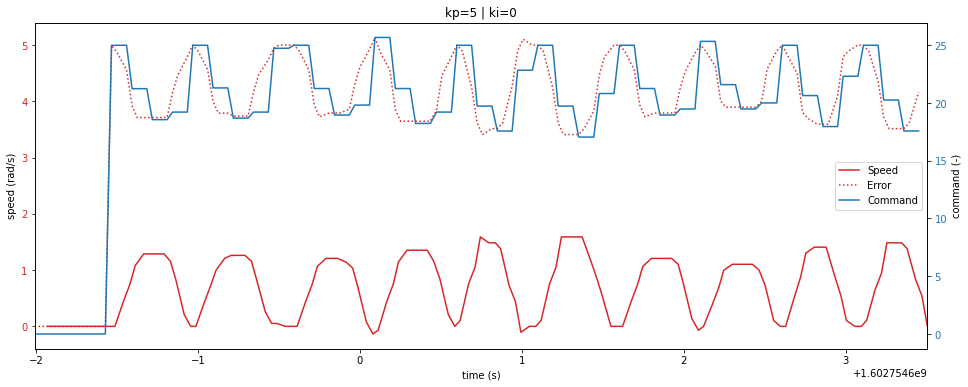

In [16]:
pid_response_p5 = OttobotPidResponse("data_load/pid_left_kp5_ki0_kd0_v1.1.txt", title="kp=5 | ki=0", delta_t_post_step=5)
pid_response_p5.plot_response()

Going any less thank kp=5 is not enough gain to move the robot. Integral gain is required, cannot select starting proportional gain without oscillation.

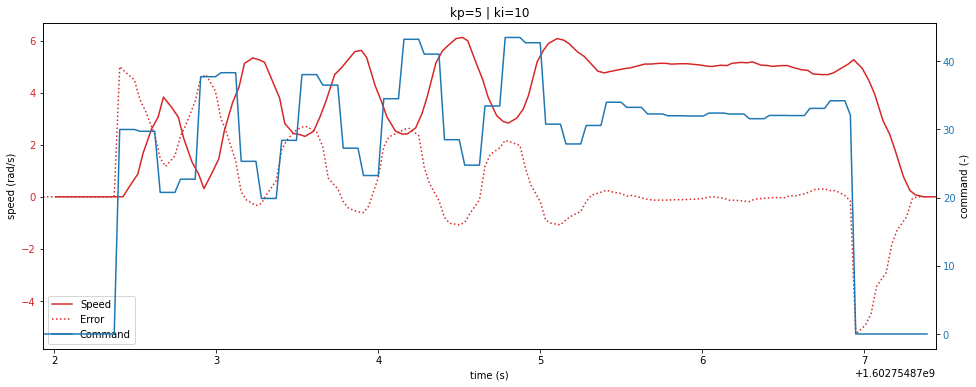

In [19]:
pid_response_p5_i10 = OttobotPidResponse("data_load/pid_left_kp5_ki10_kd0_v1.1.txt", title="kp=5 | ki=10", delta_t_post_step=5)
pid_response_p5_i10.plot_response()

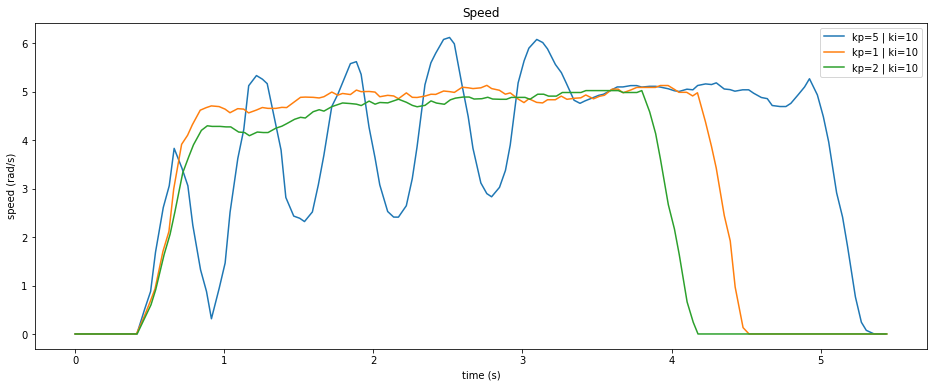

In [22]:
pid_response_p2_i10 = OttobotPidResponse("data_load/pid_left_kp2_ki10_kd0_v1.1.txt", title="kp=2 | ki=10", delta_t_post_step=5)
pid_response_p1_i10 = OttobotPidResponse("data_load/pid_left_kp1_ki10_kd0_v1.1.txt", title="kp=1 | ki=10", delta_t_post_step=5)
pid_response_p5_i10.plot_against([pid_response_p1_i10, pid_response_p2_i10])

Now set proportional gain at 1 and increase integral gain until it oscillates or overshoots massively.

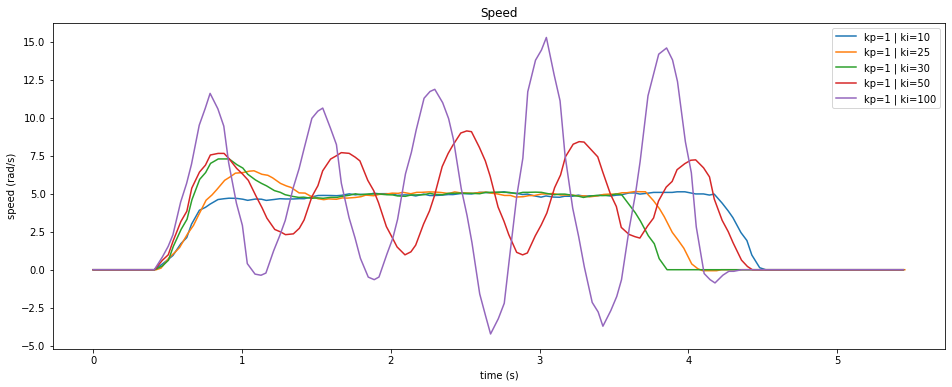

In [28]:
pid_response_p1_i100 = OttobotPidResponse("data_load/pid_left_kp1_ki100_kd0_v1.1.txt", title="kp=1 | ki=100", delta_t_post_step=5)
pid_response_p1_i50 = OttobotPidResponse("data_load/pid_left_kp1_ki50_kd0_v1.1.txt", title="kp=1 | ki=50", delta_t_post_step=5)
pid_response_p1_i25 = OttobotPidResponse("data_load/pid_left_kp1_ki25_kd0_v1.1.txt", title="kp=1 | ki=25", delta_t_post_step=5)
pid_response_p1_i30 = OttobotPidResponse("data_load/pid_left_kp1_ki30_kd0_v1.1.txt", title="kp=1 | ki=30", delta_t_post_step=5)
pid_response_p1_i10.plot_against([pid_response_p1_i25, pid_response_p1_i30, pid_response_p1_i50, pid_response_p1_i100])

Set integral gain at 10. Tune proportional gain .

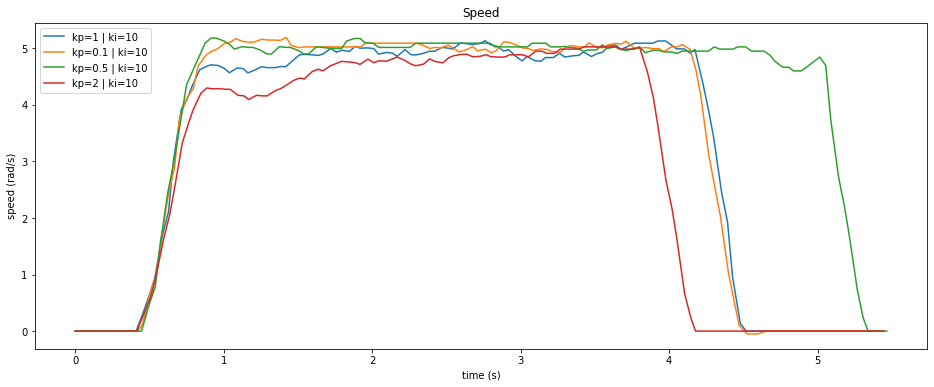

In [32]:
pid_response_p0_5_i10 = OttobotPidResponse("data_load/pid_left_kp0.5_ki10_kd0_v1.1.txt", title="kp=0.5 | ki=10", delta_t_post_step=5)
pid_response_p0_1_i10 = OttobotPidResponse("data_load/pid_left_kp0.1_ki10_kd0_v1.1.txt", title="kp=0.1 | ki=10", delta_t_post_step=5)
pid_response_p1_i10.plot_against([pid_response_p0_1_i10, pid_response_p0_5_i10, pid_response_p2_i10])

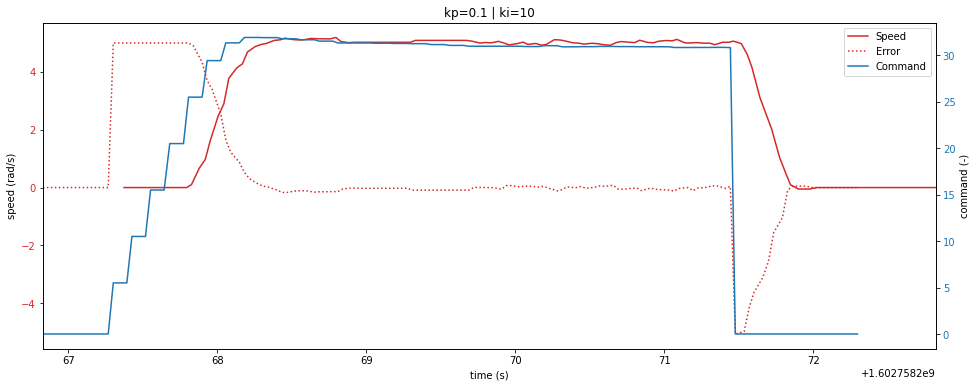

In [34]:
pid_response_p0_1_i10.plot_response()

Need to increase PID update frequency to match other calculations (20ms)

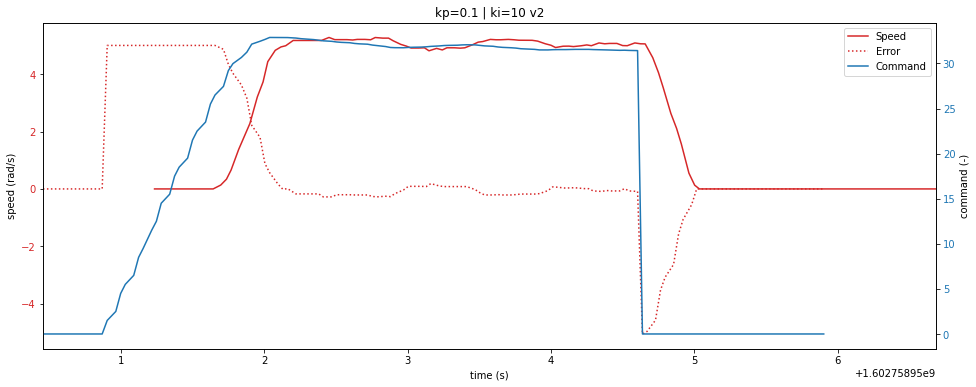

In [38]:
pid_response_p0_1_i10_v2 = OttobotPidResponse("data_load/pid_left_kp0.1_ki10_kd0_v1.2.txt", title="kp=0.1 | ki=10 v2", delta_t_post_step=5)
pid_response_p0_1_i10_v2.plot_response()

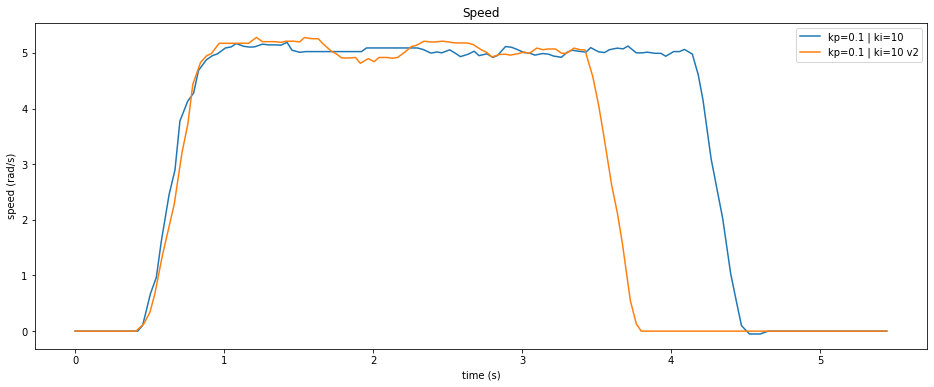

In [40]:
pid_response_p0_1_i10.plot_against([pid_response_p0_1_i10_v2])

Now revaluate settings with updated frequency and no lower output limit (previously set to 25)

Files now labelled **v2**.

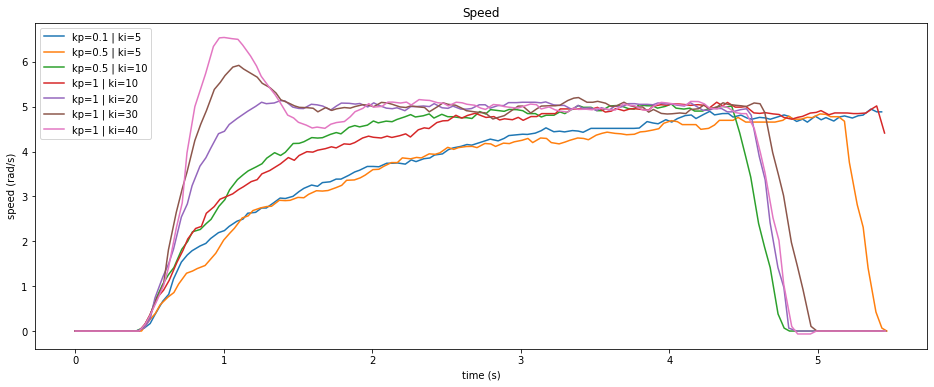

In [51]:
pid_response_p0_1_i5 = OttobotPidResponse("data_load/pid_left_kp0.1_ki5_kd0_v2.1.txt", title="kp=0.1 | ki=5", delta_t_post_step=5)
pid_response_p0_5_i5 = OttobotPidResponse("data_load/pid_left_kp0.5_ki5_kd0_v2.1.txt", title="kp=0.5 | ki=5", delta_t_post_step=5)
pid_response_p0_5_i10 = OttobotPidResponse("data_load/pid_left_kp0.5_ki10_kd0_v2.1.txt", title="kp=0.5 | ki=10", delta_t_post_step=5)
pid_response_p1_i10 = OttobotPidResponse("data_load/pid_left_kp1_ki10_kd0_v2.1.txt", title="kp=1 | ki=10", delta_t_post_step=5)
pid_response_p1_i20 = OttobotPidResponse("data_load/pid_left_kp1_ki20_kd0_v2.1.txt", title="kp=1 | ki=20", delta_t_post_step=5)
pid_response_p1_i30 = OttobotPidResponse("data_load/pid_left_kp1_ki30_kd0_v2.1.txt", title="kp=1 | ki=30", delta_t_post_step=5)
pid_response_p1_i40 = OttobotPidResponse("data_load/pid_left_kp1_ki40_kd0_v2.1.txt", title="kp=1 | ki=40", delta_t_post_step=5)
pid_response_p0_1_i5.plot_against([pid_response_p0_5_i5, pid_response_p0_5_i10, pid_response_p1_i10, pid_response_p1_i20, pid_response_p1_i30, pid_response_p1_i40])

Oscillation breaking out at about ki=30 so half to ki=15.

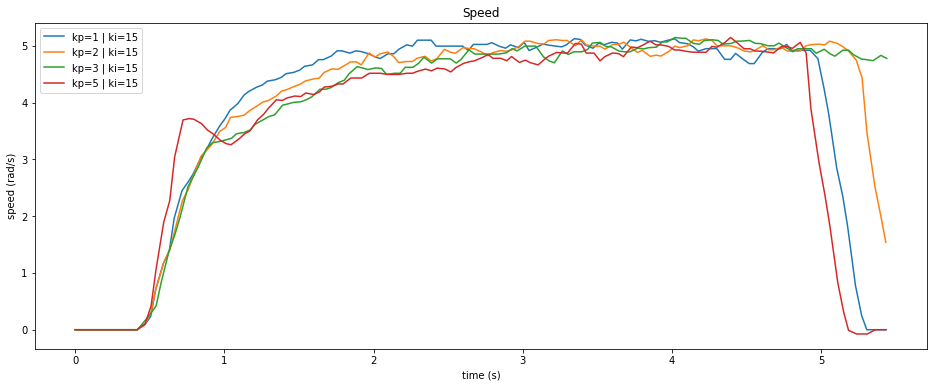

In [53]:
pid_response_p5_i15 = OttobotPidResponse("data_load/pid_left_kp5_ki15_kd0_v2.1.txt", title="kp=5 | ki=15", delta_t_post_step=5)
pid_response_p3_i15 = OttobotPidResponse("data_load/pid_left_kp3_ki15_kd0_v2.1.txt", title="kp=3 | ki=15", delta_t_post_step=5)
pid_response_p2_i15 = OttobotPidResponse("data_load/pid_left_kp2_ki15_kd0_v2.1.txt", title="kp=2 | ki=15", delta_t_post_step=5)
pid_response_p1_i15 = OttobotPidResponse("data_load/pid_left_kp1_ki15_kd0_v2.1.txt", title="kp=1 | ki=15", delta_t_post_step=5)
pid_response_p1_i15.plot_against([pid_response_p2_i15, pid_response_p3_i15, pid_response_p5_i15])

Oscillation just occuring at kp=3, set to half so kp=1.5

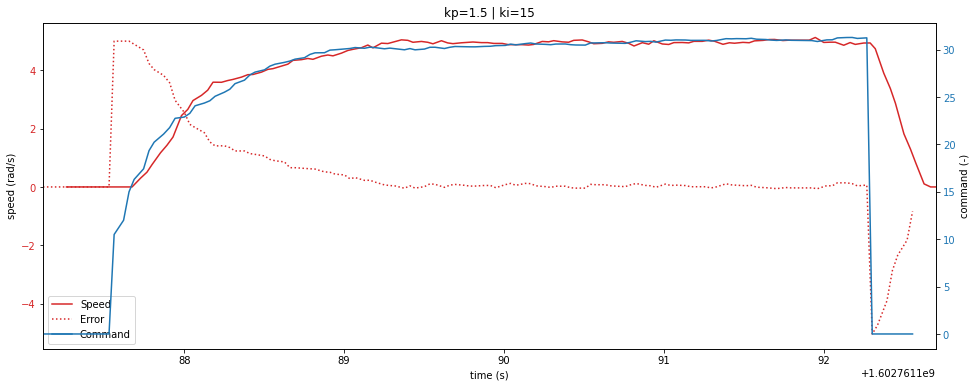

In [55]:
pid_response_p1_5_i15 = OttobotPidResponse("data_load/pid_left_kp1.5_ki15_kd0_v2.1.txt", title="kp=1.5 | ki=15", delta_t_post_step=5)
pid_response_p1_5_i15.plot_response()